# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Hagar 1536
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

In [3]:
trainset = pd.read_csv('titanic_train.csv')
trainset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [4]:
testset = pd.read_csv('titanic_test.csv')
testset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


### Survival rate by class and by sex:

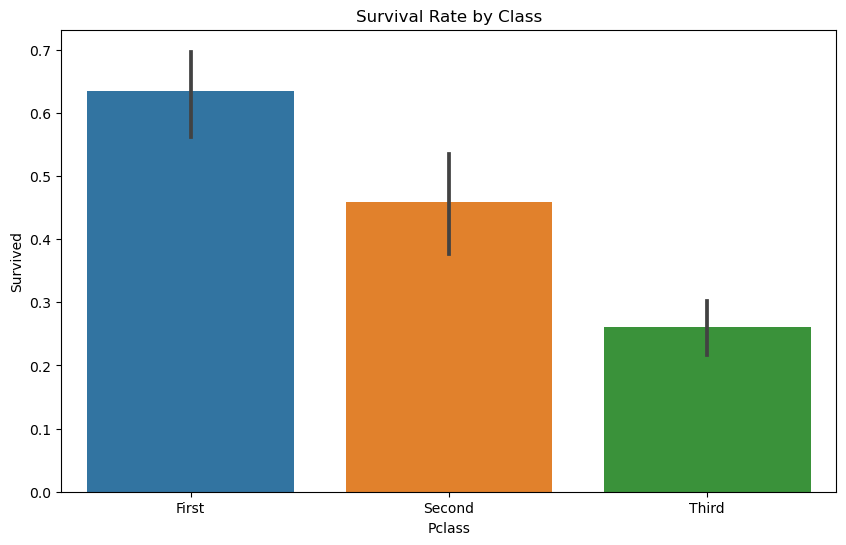

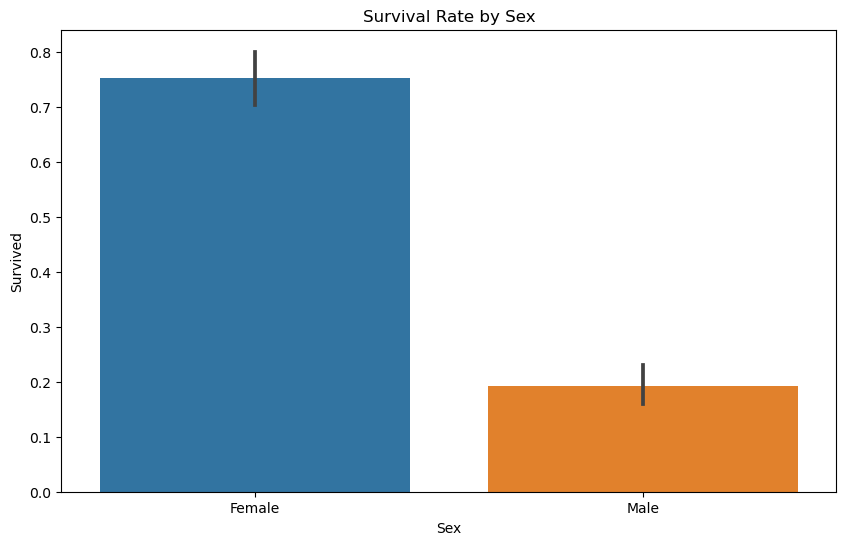

In [5]:
plt.figure(figsize=(10, 6))
trainset_copy=trainset.copy()
trainset_copy['Pclass'] = trainset_copy['Pclass'].replace({1: 'First', 2: 'Second',3:'Third'})
sns.barplot(x='Pclass', y='Survived', data=trainset_copy)
plt.title('Survival Rate by Class')
plt.show()

trainset_copy['Sex'] = trainset_copy['Sex'].replace({0: 'Female', 1: 'Male'})
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex',y='Survived',  data=trainset_copy)
plt.title('Survival Rate by Sex')
plt.show()

### Age Distribution by Class:
You can see that there are many outliers in the third class.

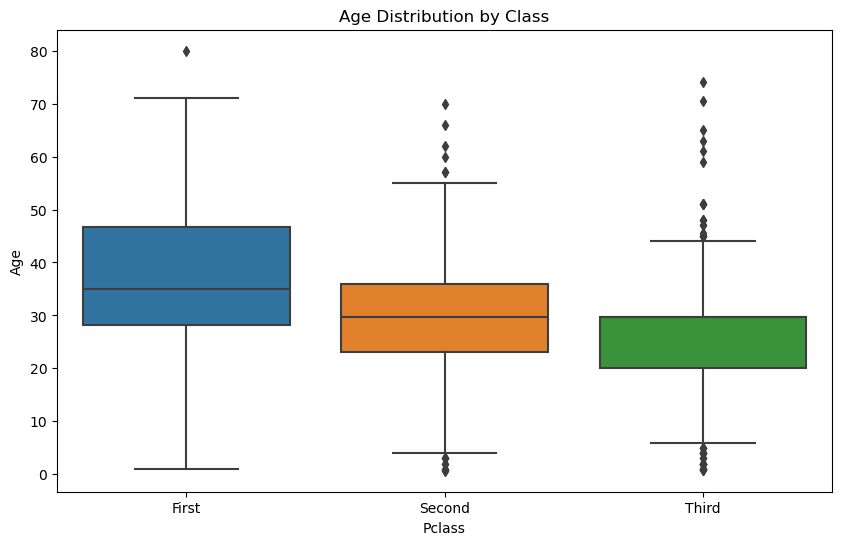

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=trainset_copy)
plt.title('Age Distribution by Class')
plt.show()

### Age Distribution by Survival:
You can see the difference among the 30 years olds.

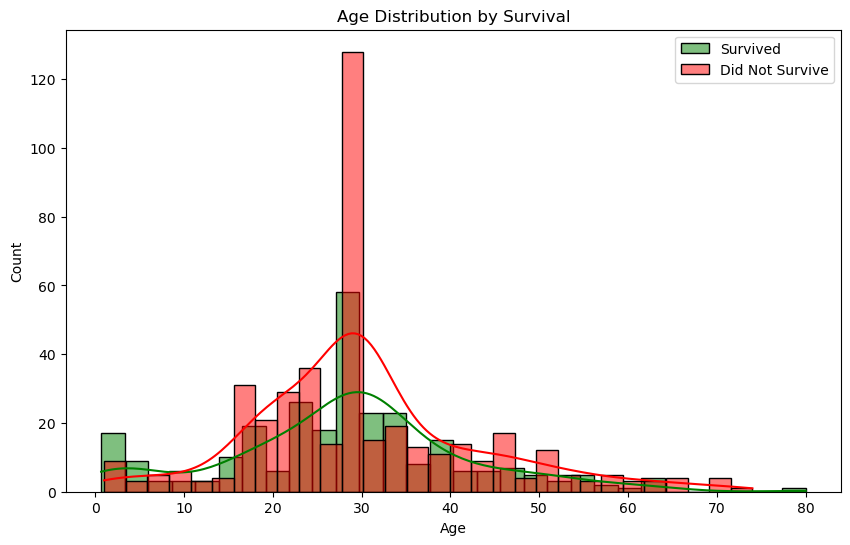

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(trainset[trainset['Survived'] == 1]['Age'].dropna(), bins=30, kde=True, color='green', label='Survived')
sns.histplot(trainset[trainset['Survived'] == 0]['Age'].dropna(), bins=30, kde=True, color='red', label='Did Not Survive')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

### Correlation Matrix of all the categories:

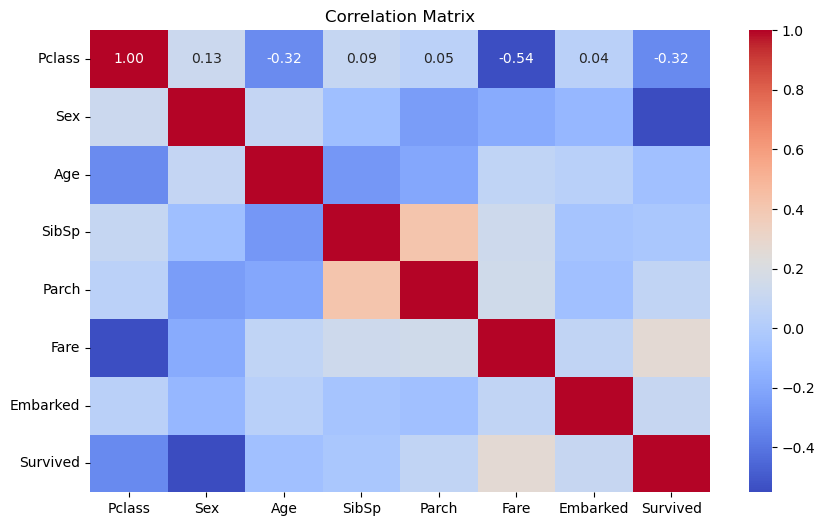

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(trainset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [9]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier as KNN

### Taking care of the missing values:
- In the numeric categories (age and fare) used mean.
- In the categorical categories (class, age, and embarked) used the onehot encoder to find the most frequent.
- The info of the DataFrame show 0 nulls

In [10]:
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


### Logistic Regression:
- Created a pipeline that includes a preprocessing step.
- Defined a grid of hyperparameters to test.
- Chose 0.01, 0.1, 1, and 10 as classifier c.
- Set up a grid search with 5-fold cross-validation to find the best hyperparameters.
- Fitted the grid search to my training data, excluding the target column Survived.
- Created a DataFrame to store the cross-validation results, including the tested parameters and their corresponding mean test scores.
- The DataFrame is sorted by the highest mean test score.

In [11]:
logistic_regression=Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression())])
param_grid_lr = {'classifier__C': [0.01,0.1, 1, 10]}
grid_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5, scoring='f1')
grid_lr.fit(trainset.drop(columns='Survived'), trainset['Survived'])
cv_results_lr = pd.DataFrame(grid_lr.cv_results_)[['params', 'mean_test_score']]
cv_results_lr['Model'] = 'Logistic Regression'
cv_results_lr.columns = ['Parameters', 'Mean Test Score','Model']
cv_results_lr.sort_values(by='Mean Test Score', ascending=False)

,Parameters,Mean Test Score,Model
2,{'classifier__C': 1},0.739707,Logistic Regression
3,{'classifier__C': 10},0.738519,Logistic Regression
1,{'classifier__C': 0.1},0.737440,Logistic Regression
0,{'classifier__C': 0.01},0.630911,Logistic Regression


### KNN:
- Created a pipeline that includes a preprocessing step.
- Defined a grid of hyperparameters to test.
- Chose 3, 5, 7, and 9 as the n.
- Chose Manhattan, Euclidean, and Chebyshev as the KNN metrics.
- Set up a grid search with 5-fold cross-validation to find the best hyperparameters.
- Fitted the grid search to my training data, excluding the target column Survived.
- Created a DataFrame to store the cross-validation results, including the tested parameters and their corresponding mean test scores.
- The DataFrame is sorted by the highest mean test score.

In [12]:
knn = Pipeline([('varianceThreshold', VarianceThreshold()),('KBest', SelectKBest()),('StandardScaler', StandardScaler()),('KNN', KNN())])
param_grid_knn = {
    'KNN__n_neighbors':   [3,5,7,9],
    'KBest__k': ['all'],
    'KNN__metric' : ['manhattan', 'euclidean','chebyshev']
}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1')
grid_knn.fit(trainset.drop(columns='Survived'), trainset['Survived'])
cv_results_knn = pd.DataFrame(grid_knn.cv_results_)[['params', 'mean_test_score']]
cv_results_knn['Model'] = 'KNN'
pd.set_option('display.max_colwidth', None)
cv_results_knn.columns = ['Parameters', 'Mean Test Score','Model']
cv_results_knn.sort_values(by='Mean Test Score', ascending=False)

,Parameters,Mean Test Score,Model
4,"{'KBest__k': 'all', 'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}",0.741661,KNN
11,"{'KBest__k': 'all', 'KNN__metric': 'chebyshev', 'KNN__n_neighbors': 9}",0.735681,KNN
3,"{'KBest__k': 'all', 'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}",0.729797,KNN
6,"{'KBest__k': 'all', 'KNN__metric': 'euclidean', 'KNN__n_neighbors': 7}",0.729367,KNN
8,"{'KBest__k': 'all', 'KNN__metric': 'chebyshev', 'KNN__n_neighbors': 3}",0.728180,KNN
2,"{'KBest__k': 'all', 'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}",0.727690,KNN
0,"{'KBest__k': 'all', 'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}",0.725193,KNN
10,"{'KBest__k': 'all', 'KNN__metric': 'chebyshev', 'KNN__n_neighbors': 7}",0.722555,KNN
1,"{'KBest__k': 'all', 'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}",0.722184,KNN
7,"{'KBest__k': 'all', 'KNN__metric': 'euclidean', 'KNN__n_neighbors': 9}",0.721038,KNN


### Random Forest:
- Created a pipeline that includes a preprocessing step.
- Defined a grid of hyperparameters to test.
- Chose 10, 50, 100 and 200 as the classifier n estimators.
- Set up a grid search with 5-fold cross-validation to find the best hyperparameters.
- Fitted the grid search to my training data, excluding the target column Survived.
- Created a DataFrame to store the cross-validation results, including the tested parameters and their corresponding mean test scores.
- The DataFrame is sorted by the highest mean test score.

In [13]:
random_forest=Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier())])
param_grid_rf = {'classifier__n_estimators': [10,50, 100, 200]}
grid_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(trainset.drop(columns='Survived'), trainset['Survived'])
cv_results_rf = pd.DataFrame(grid_rf.cv_results_)[['params', 'mean_test_score']]
cv_results_rf['Model'] = 'Random Forest'
cv_results_rf.columns = ['Parameters', 'Mean Test Score','Model']
cv_results_rf.sort_values(by='Mean Test Score', ascending=False)

,Parameters,Mean Test Score,Model
1,{'classifier__n_estimators': 50},0.753641,Random Forest
2,{'classifier__n_estimators': 100},0.745682,Random Forest
3,{'classifier__n_estimators': 200},0.736033,Random Forest
0,{'classifier__n_estimators': 10},0.710249,Random Forest


### The best results for each model:

In [14]:
best_params_lr = grid_lr.best_params_
best_score_lr = grid_lr.best_score_
print("Best Logistic Regression:" ,best_params_lr, "F1-score:",best_score_lr)

best_params_knn = grid_knn.best_params_
best_score_knn = grid_knn.best_score_
print("Best KNN:",best_params_knn, "F1-score:", best_score_knn)

best_params_rf = grid_rf.best_params_
best_score_rf = grid_rf.best_score_
print("Best Random Forest:",best_params_rf, "F1-score:", best_score_rf)

Best Logistic Regression: {'classifier__C': 1} F1-score: 0.7397072616347421
Best KNN: {'KBest__k': 'all', 'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3} F1-score: 0.741661262260402
Best Random Forest: {'classifier__n_estimators': 50} F1-score: 0.7536407766778918


### Results summary:
- Combined the cross-validation results from the Logistic Regression, KNN, and Random Forest models into a single DataFrame.
- The DataFrame is sorted by the highest mean test score.

In [15]:
summary_results = pd.concat([cv_results_lr, cv_results_rf, cv_results_knn], ignore_index=True)
summary_results.columns = ['Parameters', 'Mean Test Score','Model']
print("Summary of Cross-Validation Results:")
summary_results.sort_values(by='Mean Test Score', ascending=False)

Summary of Cross-Validation Results:


,Parameters,Mean Test Score,Model
5,{'classifier__n_estimators': 50},0.753641,Random Forest
6,{'classifier__n_estimators': 100},0.745682,Random Forest
12,"{'KBest__k': 'all', 'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}",0.741661,KNN
2,{'classifier__C': 1},0.739707,Logistic Regression
3,{'classifier__C': 10},0.738519,Logistic Regression
1,{'classifier__C': 0.1},0.737440,Logistic Regression
7,{'classifier__n_estimators': 200},0.736033,Random Forest
19,"{'KBest__k': 'all', 'KNN__metric': 'chebyshev', 'KNN__n_neighbors': 9}",0.735681,KNN
11,"{'KBest__k': 'all', 'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}",0.729797,KNN
14,"{'KBest__k': 'all', 'KNN__metric': 'euclidean', 'KNN__n_neighbors': 7}",0.729367,KNN


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

- Retrained the best model (Random Forest) on the train set.
- Save the Predictions on train data.
- Calculated F1-Score on train data.

In [16]:
best_model =grid_rf.best_estimator_ 
best_model.fit(trainset.drop(columns='Survived'), trainset['Survived'])
train_predictions = best_model.predict(trainset.drop(columns='Survived'))
f1_train = f1_score(trainset['Survived'], train_predictions)
print("F1 Score on train data (Best Model)", f1_train)

F1 Score on train data (Best Model) 0.9733570159857903


## Part 5 - Apply on test and show model performance estimation

- Used Random Forest to do the Prediction on the test set.
- Added predictions to the test DataFrame.
- Showed the first 5 rows of the test DataFrame with predictions.

In [17]:
test_predictions = best_model.predict(testset)
testset['Survived_Predicted'] = test_predictions
testset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Survived_Predicted
0,3,1,35.000000,0,0,7.0500,0,0,0
1,3,1,30.000000,0,0,7.2500,0,0,0
2,3,1,29.699118,0,0,14.5000,0,0,0
3,3,0,21.000000,0,0,7.7500,2,0,1
4,3,1,32.000000,0,0,56.4958,0,1,1


In [18]:
print("First 5 predictions on the test set: ",test_predictions[:5])

First 5 predictions on the test set:  [0 0 0 1 1]


### Calculated the F1 score on the data set:

In [19]:
f1_test = f1_score(testset['Survived'], test_predictions)
print("F1 Score on test data:", f1_test)

F1 Score on test data: 0.7833333333333333
